<a href="https://colab.research.google.com/github/sachin032/Tensorflow/blob/master/Natural%20Language%20Processing%20in%20TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# PART - 1

**Sentiment in Text**

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

class Natural_Language_Processing():
    def __init__(self):
        pass

    '''
    Very simple tokenization based on Keras API.
    Note: Tokenizer API by default removes punctuations as well.
    '''
    def corpus_tokenizer(self, sentence_list):
        #setting hyper parameter of the Tokenizer API to 100, will pick top 100 words only.
        tokenizer = Tokenizer(num_words=100)
        tokenizer.fit_on_texts(sentence_list)
        tokenized_index = tokenizer.word_index
        return tokenized_index

    '''
    Convert text to sequences
    '''
    def texts_to_sequences(self, text):
        tokenizer = Tokenizer(num_words=100)
        tokenizer.fit_on_texts(text)
        text_to_sequence = tokenizer.texts_to_sequences(text)
        return text_to_sequence
    

In [0]:
object = Natural_Language_Processing()

sentence = [
    'i love my dog', 'i love my cat', 'i love my country',
    'india is my country and it is full of nature'
]

# Tokenization
tokenized_word_index = object.corpus_tokenizer(sentence)
print(tokenized_word_index)

#Text to sequence
texts_to_sequences = object.texts_to_sequences(sentence)
print("\n\n", texts_to_sequences)

{'my': 1, 'i': 2, 'love': 3, 'country': 4, 'is': 5, 'dog': 6, 'cat': 7, 'india': 8, 'and': 9, 'it': 10, 'full': 11, 'of': 12, 'nature': 13}


 [[2, 3, 1, 6], [2, 3, 1, 7], [2, 3, 1, 4], [8, 5, 1, 4, 9, 10, 5, 11, 12, 13]]


# PART - 2

### **Word Embeddings**

**What is word embedding?**

**Word embeddings** are basically a form of word representation that bridges the human understanding of language to that of a machine.<br>Word embeddings are distributed representations of text in an n-dimensional space.<br>These are essential for solving most NLP problems.<br><br> For better understanding please have a look at [Word embedding in NLP](https://hackernoon.com/word-embeddings-in-nlp-and-its-applications-fab15eaf7430)

Let's start learning by doing.<br> **TensorFlow Dataset** aka **tfds** is great resource of data for exploring multiple Machine learning Ideas.<br>
For better understanding of this module please click on to [Tensorflow Dataset API](https://www.tensorflow.org/datasets/api_docs/python/tfds)

Make sure it is usign Python 3.X <br>
If using tensorflow version 1.X we need to run the below command<br>
**tf.enable_eager_execution()**
<br>
Reason behind running this command is that **Tensorflow 2.X** is by default have the eager execution on.
<br><br>
Let's use IMDB movie review dataset for our learning purpose.
I would love to say that before you start the experiments and getting into hot water, just have a look about the information regarding this dataset.
[IMDB Reviews](https://www.tensorflow.org/datasets/catalog/imdb_reviews)

In [0]:
import numpy as np
import tensorflow_datasets as tfds

#To tokenize the corpus
from tensorflow.keras.preprocessing.text import Tokenizer

#To maintain the uniform structure of the sequences we need to pad them
from tensorflow.keras.preprocessing.sequence import pad_sequences

class ReviewClassifier():
    def __init__(self, vocab_size, embedding_dim, sentence_max_length,
                 truncation_type):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.max_length = sentence_max_length
        self.trunc_type = truncation_type
        self.oov_tok = "<OOV>"

    '''
    Load the IMDB dataset using tfds API from Tendorflow.
    '''
    def dataLoader(self):
        imdb, info = tfds.load('imdb_reviews',
                               with_info=True,
                               as_supervised=True)
        return imdb, info

    '''
    Definition to split the data into train and test
    '''
    def dataSplitter(self, imdb):
        # 25k samples for each sample set
        train_data, test_data = imdb['train'], imdb['test']
        return train_data, test_data

    '''
    We need to convert the training and testing dataset to an array of sentences
    '''
    def dataConverter(self, imdb):

        train_data, test_data = self.dataSplitter(imdb)

        training_sentences = []
        training_labels = []

        testing_sentences = []
        testing_labels = []

        for sentence, label in train_data:
            training_sentences.append(str(sentence.numpy()))
            training_labels.append(str(label.numpy()))

        for sentence, label in test_data:
            testing_sentences.append(str(sentence.numpy()))
            testing_labels.append(str(label.numpy()))

        training_labels_final = np.array(training_labels)
        training_labels_final = training_labels_final.astype(np.float)
        testing_labels_final = np.array(testing_labels)
        testing_labels_final = testing_labels_final.astype(np.float)

        tokenizer = Tokenizer(num_words=self.vocab_size,
                              oov_token=self.oov_tok)
        tokenizer.fit_on_texts(training_sentences)
        word_index = tokenizer.word_index

        training_sequences = tokenizer.texts_to_sequences(training_sentences)
        training_padded = pad_sequences(training_sequences,
                                        maxlen=self.max_length,
                                        truncating=self.trunc_type)

        testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
        testing_padded = pad_sequences(testing_sequences,
                                       maxlen=self.max_length)

        return training_sentences, training_padded,training_labels_final, testing_sentences, testing_padded,testing_labels_final

    def decode_review(self, text):
        tokenizer = Tokenizer(num_words=self.vocab_size,
                              oov_token=self.oov_tok)
        tokenizer.fit_on_texts(training_sentences)
        word_index = tokenizer.word_index
        reverse_word_index = dict([(value, key)
                                   for (key, value) in word_index.items()])
        return ' '.join([reverse_word_index.get(i, '?') for i in text]) , reverse_word_index

In [0]:
'''
vocab_size,
embedding_dim,
sentence_max_length,
truncation_type
'''

obj = ReviewClassifier(1000, 16, 120, 'post')
imdb, info = obj.dataLoader()
train, test = obj.dataSplitter(imdb)
training_sentences, training_padded, training_labels_final, testing_sentences, testing_padded, testing_labels_final = obj.dataConverter(
    imdb)
reverse_word_index = obj.decode_review(training_padded[1])

In [0]:
print(train)
print(test)

<_OptionsDataset shapes: ((), ()), types: (tf.string, tf.int64)>


In [0]:
import datetime
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_train_batch_begin(self, batch, logs=None):
        print('Training: batch {} begins at {}'.format(
            batch,
            datetime.datetime.now().time()))

    def on_train_batch_end(self, batch, logs=None):
        print('Training: batch {} ends at {}'.format(
            batch,
            datetime.datetime.now().time()))

    def on_test_batch_begin(self, batch, logs=None):
        print('Evaluating: batch {} begins at {}'.format(
            batch,
            datetime.datetime.now().time()))

    def on_test_batch_end(self, batch, logs=None):
        print('Evaluating: batch {} ends at {}'.format(
            batch,
            datetime.datetime.now().time()))

    def on_proper_accuracy(self, logs={}):
        accuracy = logs.get('accuracy')
        if type(logs.get('accuracy')) != None and (accuracy > 0.95):
            print(
                "\n Chances are model learning headaing towards Overfitting\n\n"
            )
            self.model.stop_training = True

class Model_Builder:
    def __init__(self):
        pass

    def model(self, vocab_size, embedding_dim, max_length):
        model = Sequential()
        model.add(Embedding(vocab_size, embedding_dim,
                            input_length=max_length))
        model.add(Flatten())
        model.add(Dense(6, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        model.summary()
        return model

obj = Model_Builder()
callback = MyCustomCallback()
model = obj.model(1000, 16, 120)

history = model.fit(training_padded,
                    training_labels_final,
                    epochs=10,
                    validation_data=(testing_padded, testing_labels_final),
                    verbose=1)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 27,533
Trainable params: 27,533
Non-trainable params: 0
_________________________________________________________________


/home/sachin/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 6s 244us/step - loss: 0.5307 - accuracy: 0.7148 - val_loss: 0.3927 - val_accuracy: 0.8203
Epoch 2/10
25000/25000 [==============================] - 5s 203us/step - loss: 0.3893 - accuracy: 0.8244 - val_loss: 0.3948 - val_accuracy: 0.8186
Epoch 3/10
25000/25000 [==============================] - 6s 231us/step - loss: 0.3326 - accuracy: 0.8569 - val_loss: 0.4144 - val_accuracy: 0.8092
Epoch 4/10
25000/25000 [==============================] - 7s 286us/step - loss: 0.2681 - accuracy: 0.8936 - val_loss: 0.4647 - val_accuracy: 0.7947
Epoch 5/10
25000/25000 [==============================] - 6s 249us/step - loss: 0.2085 - accuracy: 0.9237 - val_loss: 0.5438 - val_accuracy: 0.7835
Epoch 6/10
25000/25000 [==============================] - 6s 236us/step - loss: 0.1585 - accuracy: 0.9451 - val_loss: 0.6286 - val_accuracy: 0.7768
Epoch 7/10
25000/25000 [==============================] - 6s 2

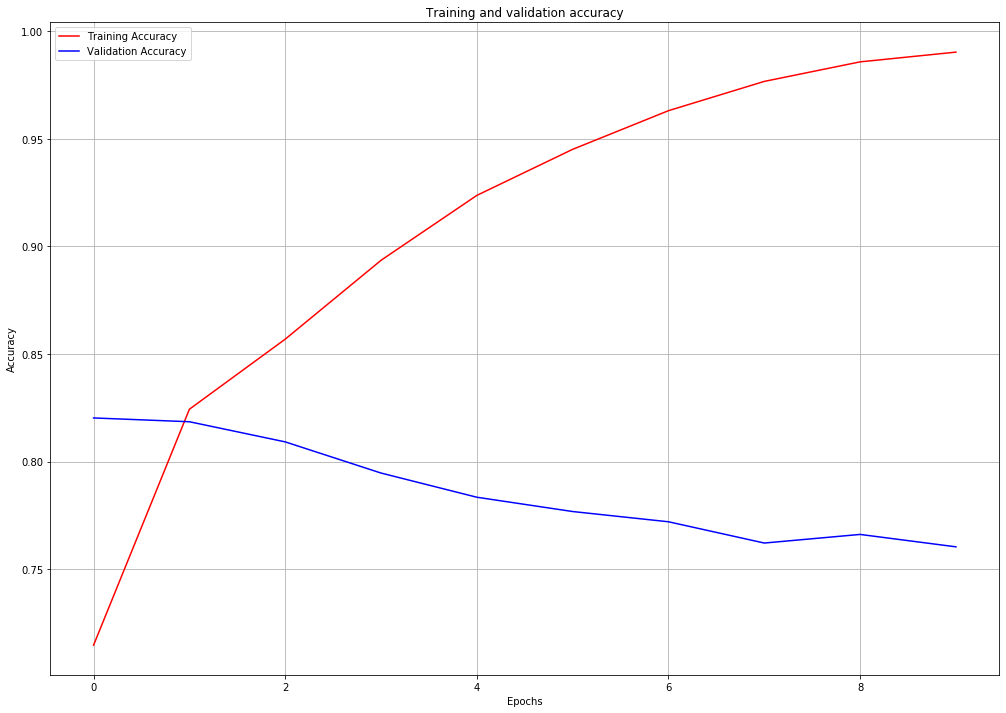

In [0]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))

plt.figure(figsize=(17,12))
plt.plot(epochs, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.grid()
plt.show()

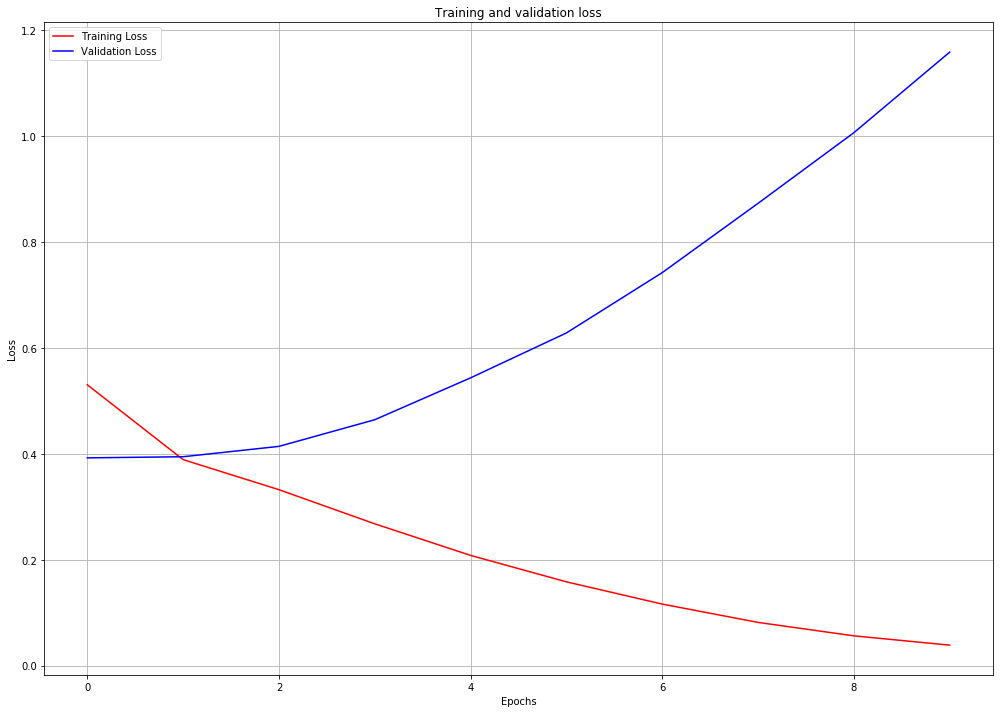

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(17,12))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.grid()
plt.show()

In [0]:
## Model Overfitted
#Model.layers[0] means layer zero and it contains the embedding information
#Let's fetch it and have a look
e = model.layers[0]
weights = e.get_weights()[0]

print(weights.shape)

#Let's save the embedding metadatas so that we can later visualize the embeddings 
import io
reverse_word_index = reverse_word_index[1]
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, 1000):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(1000, 16)


As it is visible, after training to 10 epochs the validation loss seems to be on sky high flight, There must be some tweaks to control this behavior during learning process as it is clear sign of over fitting. Both Training and validation loss must be moving towards minimal values and we can tolerate at some trade off between them.<br>
Let's change some hyper parameters to tackle this.

# PART - 3

**Let's Work on Sarcasm dataset**

#Sarcasm data download
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \-O /tmp/sarcasm.json

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


class Sarcasm_Classifier:
    def __init__(self):
        self.vocab_size = 100000
        self.embedding_dim = 16
        self.max_length = 32
        self.trunc_type = 'post'
        self.padding_type = 'post'
        self.oov_tok = "<OOV>"
        self.training_size = 13354
        self.testing_size = 13354
        self.word_index = 0

    def data_colector(self):
        sentences = []
        lablels = []
        tuplet = []
        with open("/tmp/sarcasm.json", 'r') as f:
            datastore = json.load(f)

            for item in datastore:
                sentences.append(item['headline'])
                lablels.append(item['is_sarcastic'])
                tuplet.append((item['headline'], item['is_sarcastic']))
        return sentences, lablels, tuplet

    def data_renderer(self, tuplet):
        count = 1
        for i in tuplet:
            print("Article-" + str(count) + ":" + i[0] + "----->>>>>  " +
                  str(i[1]))
            count += 1

    def data_splitor(self, sentences, lables):
        tokenizer = Tokenizer()
        training_sentences = sentences[:self.training_size]
        tokenizer.fit_on_texts(training_sentences)
        self.word_index = tokenizer.word_index
        training_sequences = tokenizer.texts_to_sequences(training_sentences)
        training_padded = pad_sequences(training_sequences,
                                        maxlen=self.max_length,
                                        truncating=self.trunc_type)
        training_labels = lables[:self.training_size]
        training_labels_final = np.array(training_labels)
        training_labels_final = training_labels_final.astype(np.float)

        
        
        testing_sentences = sentences[self.testing_size:]
        tokenizer.fit_on_texts(testing_sentences)
        testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
        testing_padded = pad_sequences(testing_sequences,
                                       maxlen=self.max_length,
                                       truncating=self.trunc_type)
        testing_labels = lables[self.testing_size:]
        testing_labels_final = np.array(testing_labels)
        testing_labels_final = testing_labels_final.astype(np.float)
        
        return training_padded, training_labels_final, testing_padded, testing_labels_final

    def modeler(self):
        model = Sequential()
        model.add(
            Embedding(self.vocab_size,
                      self.embedding_dim,
                      input_length=self.max_length))
        model.add(Flatten())
        model.add(Dense(6, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
        model.summary()
        return model

In [0]:
obj = Sarcasm_Classifier()
sentences,lables, tuplet = obj.data_colector()
training_padded,training_labels,testing_padded,testing_labels = obj.data_splitor(sentences,lables)
model = obj.modeler()
history = model.fit(training_padded,
                    training_labels,
                    epochs=5,
                    batch_size = 100,
                    validation_data=(testing_padded, testing_labels),
                    verbose=1)

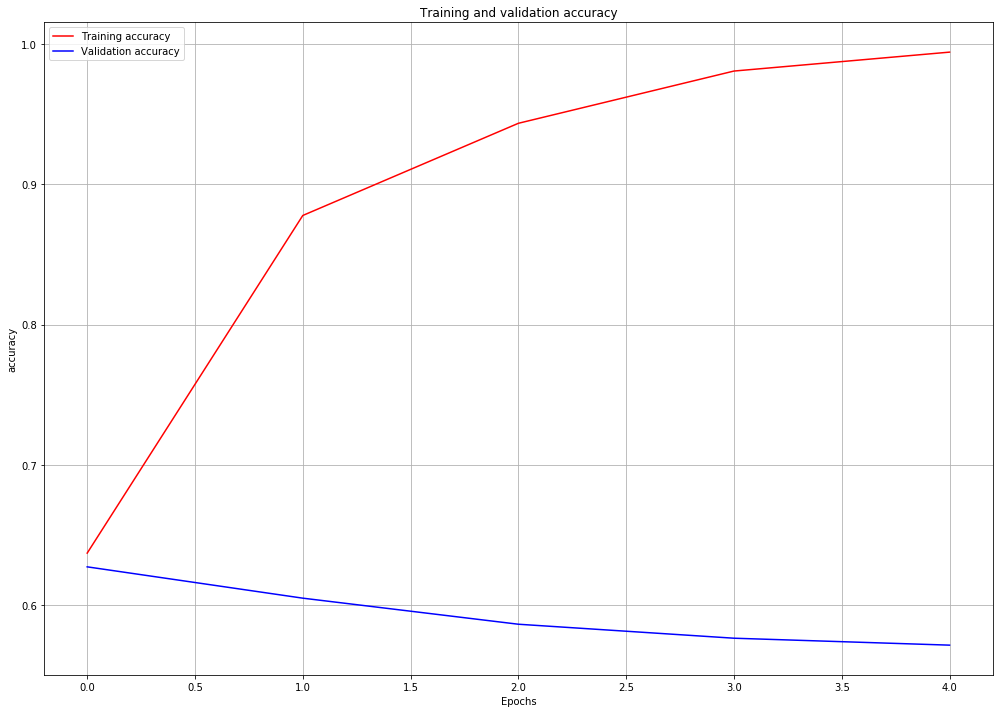

In [0]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(len(accuracy))
plt.figure(figsize=(17,12))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc=0)
plt.grid()
plt.show()

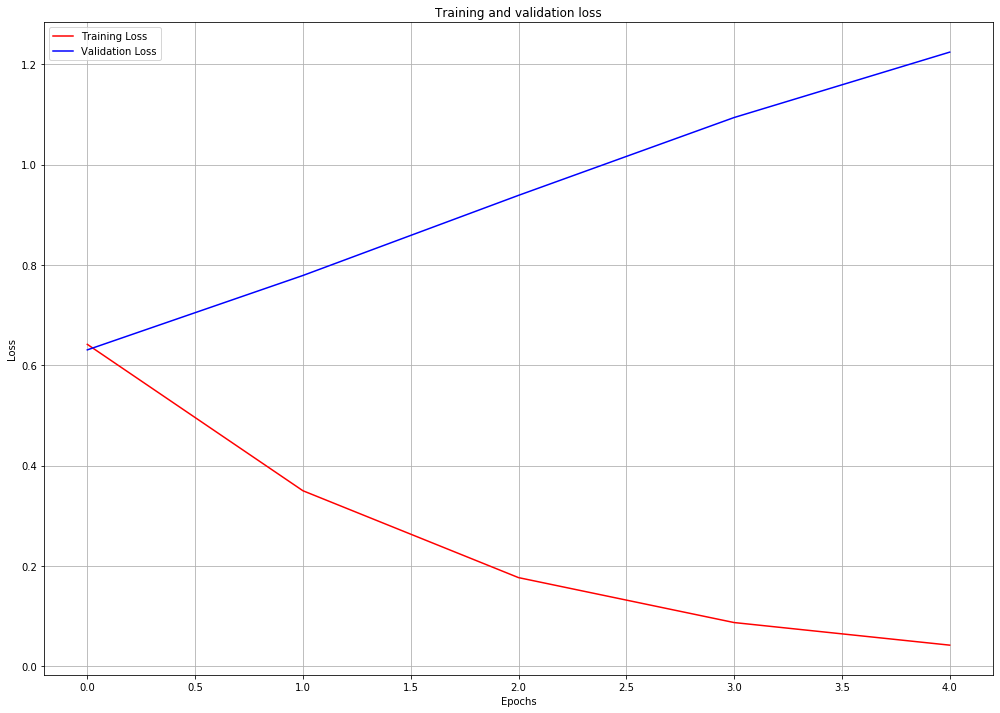

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.figure(figsize=(17,12))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.grid()
plt.show()